In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy
import seaborn as sns
from nltk.corpus import stopwords, gutenberg
from collections import Counter
import re
import scipy
import nltk
import warnings
warnings.filterwarnings("ignore")

In [2]:
per_15 = ['truth_chaucer', 'to_rosemounde_chaucer', 'troilus_criseyde_chaucer', 
          'phillip_sparrow_skelton', 'mannerly_skelton', 'mistress_hussey_skelton',
          'tunning_rumming_skelton', 'womanhood_skelton', 'blow_northerne_anon', 
          'younger_sister_anon', 'st_stephen_anon']
per_16_17 = ['phoenix_turtle_shakespeare','sonnet_18_shakespeare', 'sonnet_25_shakespeare', 
             'sonnet_87_shakespeare','sonnet_71_shakespeare', 'at_a_solemn_milton', 'on_shakespeare_milton',
             'sonnet_7_milton', 'lallegro_milton', 'elegy_to_memory_pope', 'you_know_where_pope',
             'universal_prayer_pope', 'ode_solitude_pope']
per_18 = ['america_whitman', 'i_hear_america_whitman', 'o_captian_whitman', 'ebbd_whitman', 
          'out_of_cradle_whitman', '340_dickinson', 
          '355_dickinson', '479_dickinson', '1325_dickinson', 'song_experience_blake',
          'song_innocence_blake', 'smile_blake', 'love_and_death_byron', 'walks_beauty_byron',
          'darkness_byron', 'dear_doctor_byron']
per_19_1 =['of_mere_stevens', 'snowman_stevens', 'key_west_stevens', 'modern_poetry_stevens', 
           'portrait_lady_eliot', 'sweeney_eliot', 'if_kipling', 'children_kipling', 
           'city_sleep_kipilng', 'for_all_kipling', 'between_walls_wcw', 'red_wheelbarrow_wcw', 
           'love_song_wcw', 'ball_game_wcw', 'all_in_green_cummings', 'in_just_cummings', 
           'kitty_cummings', 'o_sweet_cummings', 'into_sternuous_cummings']
per_19_2 = [ 'howl_ginsberg', 'homework_ginsberg', 'sad_self_ginsberg', 
             'sunflower_ginsberg', 'america_ginsberg', 'fever_plath', 
             'ariel_plath', 'edge_plath', 'morning_song_plath', 'colossus_plath', 
             'caged_angelou', 'still_i_angelou', 'mothering_blackness_angelou', 
             'phenom_woman_angelou','personal_ohara', 'ave_maria_ohara', 'the_day_ohara']

files = ['truth_chaucer', 'to_rosemounde_chaucer', 'troilus_criseyde_chaucer', 
            'phillip_sparrow_skelton', 'mannerly_skelton', 'mistress_hussey_skelton',
            'tunning_rumming_skelton', 'womanhood_skelton', 'blow_northerne_anon', 
             'younger_sister_anon', 'st_stephen_anon', 'phoenix_turtle_shakespeare','sonnet_18_shakespeare', 'sonnet_25_shakespeare', 
             'sonnet_87_shakespeare','sonnet_71_shakespeare', 'at_a_solemn_milton', 'on_shakespeare_milton',
             'sonnet_7_milton', 'lallegro_milton', 'elegy_to_memory_pope', 'you_know_where_pope',
             'universal_prayer_pope', 'ode_solitude_pope','america_whitman', 'i_hear_america_whitman', 'o_captian_whitman', 'ebbd_whitman', 
          'out_of_cradle_whitman', '340_dickinson', 
         '355_dickinson', '479_dickinson', '1325_dickinson', 'song_experience_blake',
         'song_innocence_blake', 'smile_blake', 'love_and_death_byron', 'walks_beauty_byron',
         'darkness_byron', 'dear_doctor_byron', 'of_mere_stevens', 'snowman_stevens', 
         'key_west_stevens', 'modern_poetry_stevens', 
         'portrait_lady_eliot', 'sweeney_eliot', 'if_kipling', 'children_kipling', 
         'city_sleep_kipilng', 'for_all_kipling', 'between_walls_wcw', 'red_wheelbarrow_wcw', 
          'love_song_wcw', 'ball_game_wcw', 'all_in_green_cummings', 'in_just_cummings', 
         'kitty_cummings', 'o_sweet_cummings', 'into_sternuous_cummings',  'howl_ginsberg', 'homework_ginsberg', 'sad_self_ginsberg', 'sunflower_ginsberg', 'america_ginsberg',
             'fever_plath', 'ariel_plath', 'edge_plath', 'morning_song_plath', 'colossus_plath', 
             'caged_angelou', 'still_i_angelou', 'mothering_blackness_angelou', 'phenom_woman_angelou',
             'personal_ohara', 'ave_maria_ohara', 'the_day_ohara']
         

In [3]:
filedata = {file: open('C:\\Users\\justf\\Desktop\\txtfiles\\' + file + '.txt', 'r') for file 
            in files}

In [4]:
author = []
title = []
period = []
columns = []
text = []

In [5]:
def text_and_split(files):
    
    for file in files:
        poem = filedata[file].read()
        split = file.split('_')
        name = split[-1]
        work = split[:-1]
        text.append(poem)
        author.append(name)
        title.append(work)

In [6]:
text_and_split(per_15)

In [7]:
text_and_split(per_16_17)

In [8]:
text_and_split(per_18)

In [9]:
text_and_split(per_19_1)

In [10]:
text_and_split(per_19_2
              )

In [11]:
col_per = ['period 15','period 15','period 15','period 15','period 15',
           'period 15','period 15','period 15','period 15','period 15','period 15','period 16/17',
           'period 16/17','period 16/17','period 16/17','period 16/17','period 16/17',
           'period 16/17','period 16/17','period 16/17','period 16/17','period 16/17',
           'period 16/17','period 16/17','period 18','period 18','period 18','period 18',
           'period 18','period 18','period 18','period 18','period 18','period 18',
           'period 18','period 18','period 18','period 18','period 18','period 18','period 19_1', 
           'period 19_1','period 19_1','period 19_1','period 19_1','period 19_1','period 19_1',
           'period 19_1','period 19_1','period 19_1','period 19_1','period 19_1','period 19_1',
           'period 19_1','period 19_1','period 19_1','period 19_1','period 19_1','period 19_1',
           'period 19_2', 'period 19_2','period 19_2','period 19_2','period 19_2','period 19_2',
           'period 19_2','period 19_2','period 19_2','period 19_2','period 19_2','period 19_2',
           'period 19_2','period 19_2','period 19_2','period 19_2','period 19_2']

In [12]:
def cleaner(text):
    text = re.sub('[ï»¿]', '', text)
    text = re.sub('[â€™]', '', text)
    text = re.sub('[ã©]', '', text)
    text = text.lower()
    return text

In [13]:
clean_text = []
for i in range(len(text)):
    clean = cleaner(text[i])
    clean_text.append(clean)

In [14]:
line_splits = []
for i in range(76):
    lines = clean_text[i].split('\n\n')
    line_splits.append(lines)

In [15]:
line_split_clean = []
for i in range(len(line_splits)):
    for j in range(len(line_splits[i])):
        lines = ' '.join(line_splits[i][j].split())
        line_split_clean.append(lines)

In [16]:
period = col_per

In [17]:
df = pd.DataFrame({'poem':clean_text, 'author': author, 'period': period, 'title': title})

In [18]:
title_join = []
for i in range(len(title)):
    work = ''.join(title[i])
    title_join.append(work)

In [19]:
df['title'] = title_join

In [20]:
df_2 = pd.DataFrame(line_splits)
df_2['title'] = title_join

In [32]:
df_3 = pd.merge(df, df_2, on='title')

In [33]:
df_3 = df_3.set_index('title')

In [34]:
df_ant = df_3[['author', 'period']]

In [35]:
set_index = df_3.drop(['poem', 'period', 'author'], axis=1)

In [36]:
set_index = set_index.stack()

In [37]:
set_index = set_index.to_frame()

In [532]:
set_index = set_index.reset_index()

In [42]:
stanza_df = pd.merge(df_ant, set_index, how='right', on='title')

In [43]:
stanza_df.head()

,author,period,0
title,,,
truth,chaucer,period 15,"fle fro the pres, and dwelle with sothefastnes..."
truth,chaucer,period 15,"tempest the nought al croked to redresse,\nin ..."
truth,chaucer,period 15,"that the is sent, receyve in buxumnesse;..."
truth,chaucer,period 15,"therfore, thou vache, leve thine olde wr..."
torosemounde,chaucer,period 15,"madame, ye ben of al beaute shryne\nas fer as ..."


In [44]:
stanza_df.columns = ['author', 'period', 'stanza']

In [45]:
stanza_df.reset_index(inplace=True)

In [46]:
stanza_df.iloc[:,3] = stanza_df.iloc[:,3].astype('str')

In [47]:
cleaned = []
for i in range(len(stanza_df)):
    clean = ' '.join(stanza_df.iloc[i,3].split())
    cleaned.append(clean)

In [48]:
stanza_df.iloc[:,3] = cleaned

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=1, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=False, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

In [50]:
tfidf = vectorizer.fit_transform(stanza_df.iloc[:,3].values)

In [58]:
from sklearn.cluster import KMeans

num_clusters = 7
km = KMeans(n_clusters=num_clusters, random_state=24)

%time km.fit(tfidf)

clusters = km.labels_.tolist()

Wall time: 1.5 s


In [59]:
centers = km.cluster_centers_

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf)

In [61]:
import matplotlib as mpl
from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2,  dissimilarity="precomputed", random_state=24)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [62]:
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=stanza_df.iloc[:,1])) 
groups = df.groupby('label')

In [63]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'} #3: '#e7298a',
#                   4:'#BDB76B'}
#         5:'#FFD700', 6: '#00FF00', 7:'#FAA460'}

#set up cluster names using a dict
cluster_names = {0: 'One', 
                 1: 'Two', 
                 2: 'Three'}
#                  3: 'Four',
#                  4: 'Five'}

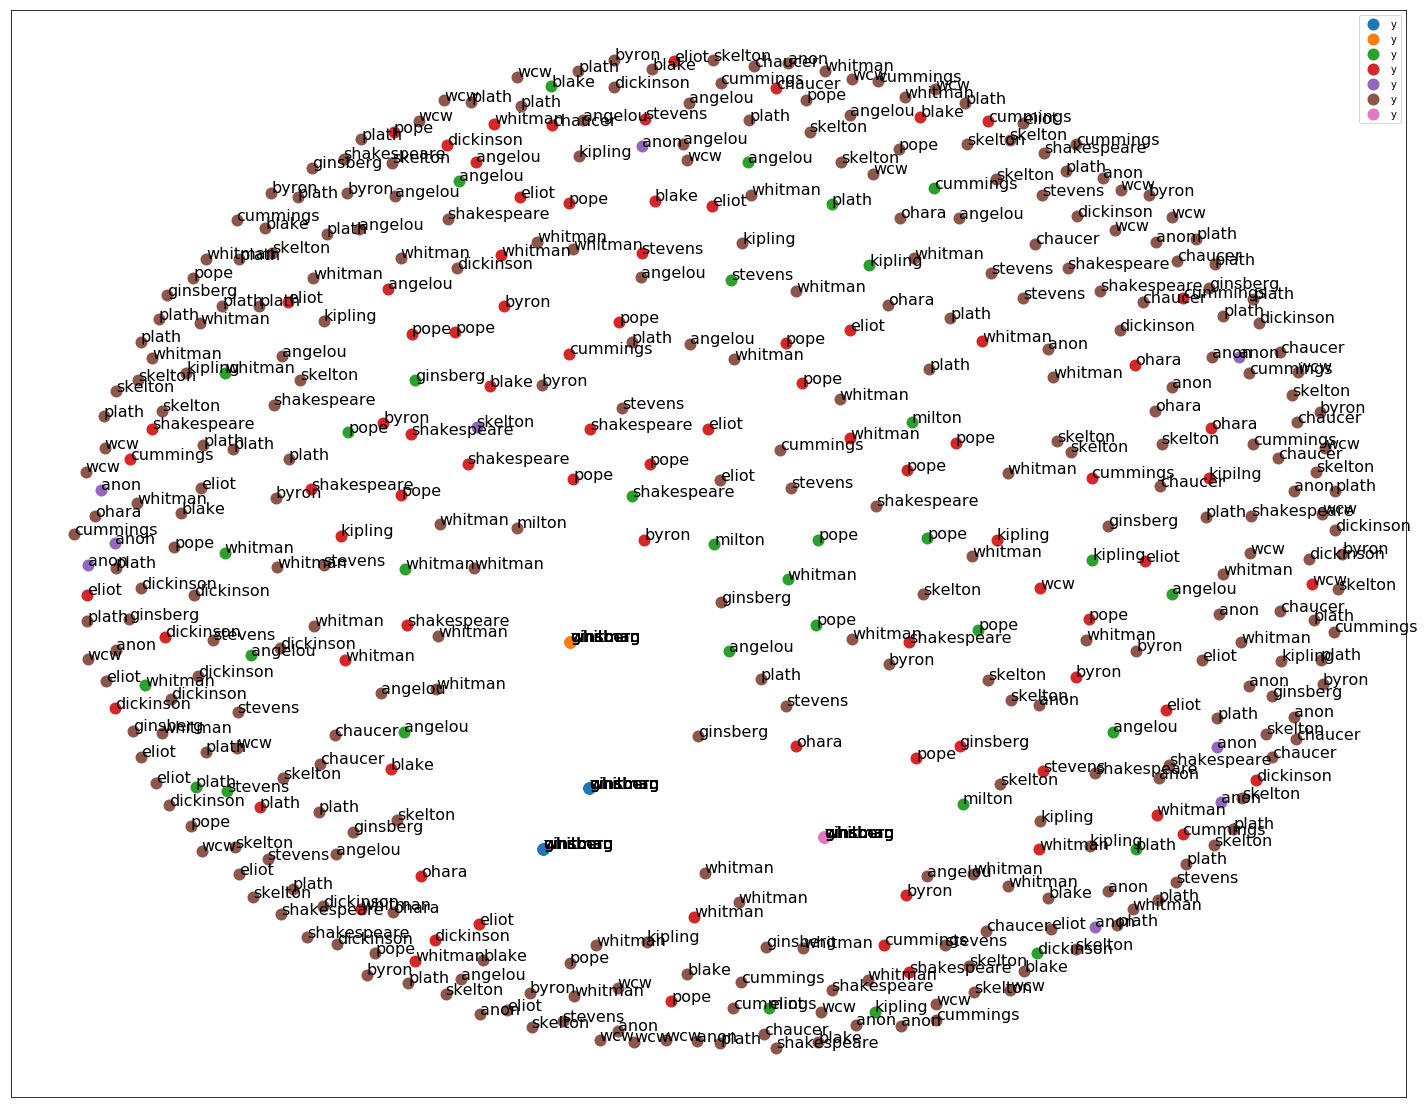

In [65]:
fig, ax = plt.subplots(figsize=(25, 20)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
#             label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=16)  

    
    
plt.show() #show the plot

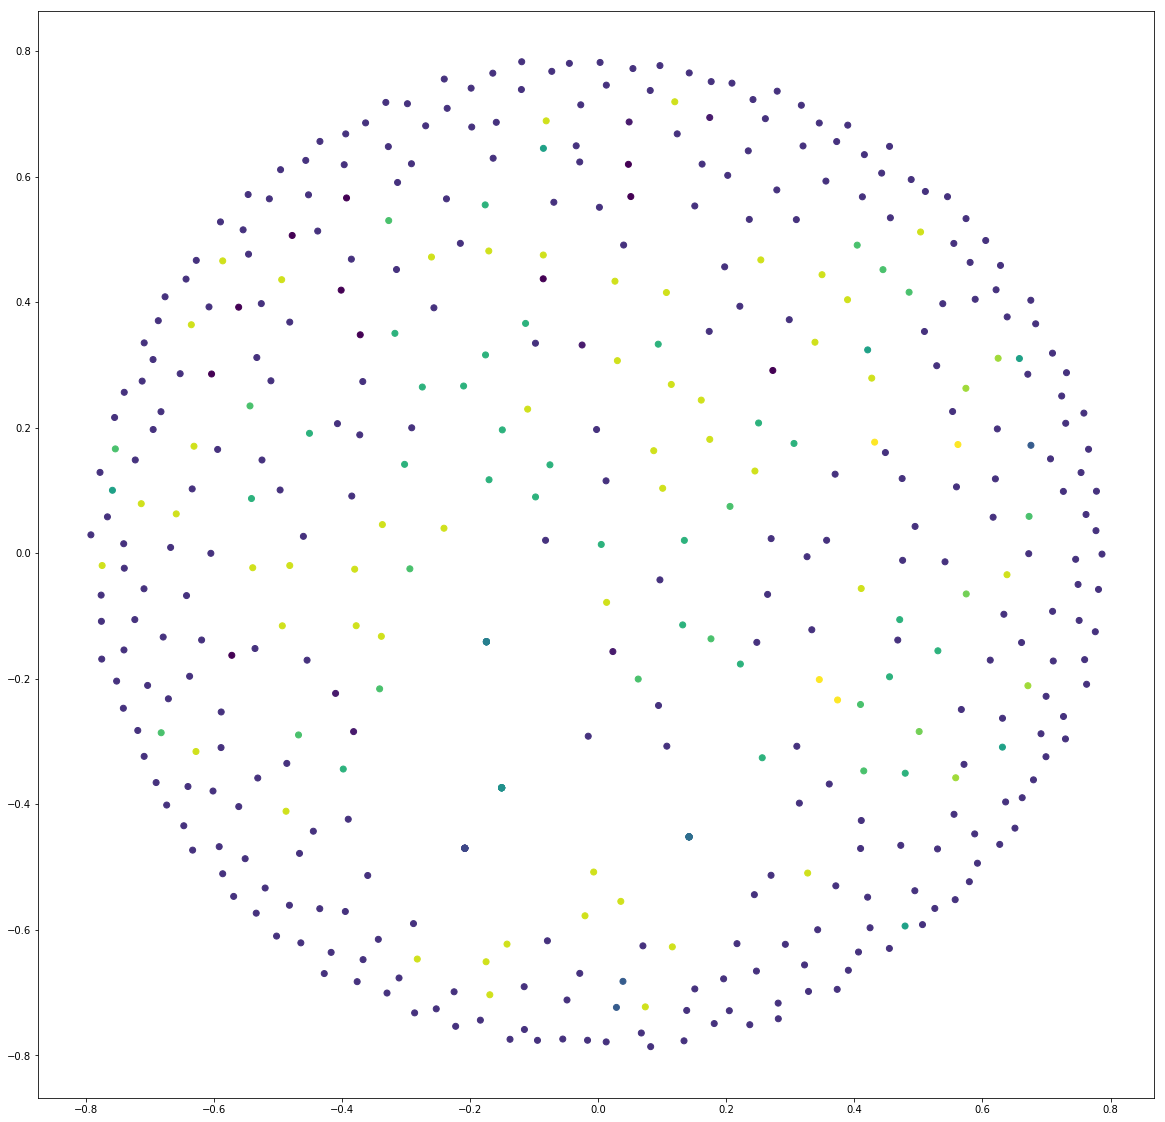

In [670]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=15

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(tfidf)

#Predicted clusters.
predict=sc.fit_predict(tfidf)

# #Graph results.
plt.figure(figsize=(20,20))
plt.scatter(xs, ys, c=predict)
plt.show()


In [672]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation().fit(tfidf)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 15


In [66]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(n_clusters=10, batch_size= 300, max_iter=10000, init='k-means++', random_state=24)
X = mbk.fit_transform(tfidf)
mini_clusters = mbk.labels_.tolist()

In [69]:
xs_mini, ys_mini = pos[:, 0], pos[:, 1]
df_mini = pd.DataFrame(dict(x=xs, y=ys, label=mini_clusters, title=stanza_df.iloc[:,1])) 
groups_mini = df_mini.groupby('label')

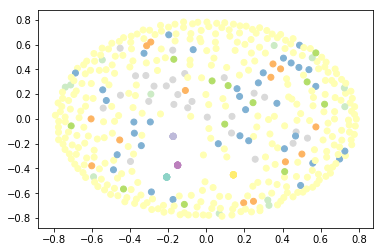

In [75]:
plt.scatter(xs, ys, c=mini_clusters, cmap='Set3')
plt.show()

In [77]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [76]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [79]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in stanza_df.iloc[:,3]:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [80]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 29258 items in vocab_frame


In [82]:
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

In [90]:
 for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()
    print("Cluster %d titles:" % i, end='') 
    for title in df.iloc[i]['title']:
        print(' %s,' % title)
        print()
        print()

Cluster 0: america
 im
 russians
 dont
 wants
 read
 good
 want
 mind
 right
Cluster 0 titles: c,


 h,


 a,


 u,


 c,


 e,


 r,


Cluster 1: millions
 resources
 national
 catholic
 fact
 flowerpots
 institutions
 literature
 abolished
 unpublishable
Cluster 1 titles: c,


 h,


 a,


 u,


 c,


 e,


 r,


Cluster 2: shall
 body
 captain
 rise
 caged
 lies
 bird
 thou
 soul
 fallen
Cluster 2 titles: c,


 h,


 a,


 u,


 c,


 e,


 r,


Cluster 3: thy
 know
 let
 world
 spring
 smile
 thou
 thee
 life
 smiles
Cluster 3 titles: c,


 h,


 a,


 u,


 c,


 e,


 r,


Cluster 4: kyng
 alle
 herowdes
 halle
 stevene
 quat
 mete
 werkes
 forsak
 beter
Cluster 4 titles: c,


 h,


 a,


 u,


 c,


 e,


 r,


Cluster 5: love
 ye
 like
 white
 sea
 night
 rise
 moon
 death
 water
Cluster 5 titles: c,


 h,


 a,


 u,


 c,


 e,


 r,


Cluster 6: equal
 grown
 capable
 ungrown
 daughters
 sons
 endeard
 towering
 ample
 enduring
Cluster 6 titles: c,


 h,


 a,


 u,


 c,


 

In [96]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(90)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
lsa_fit = lsa.fit_transform(tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(lsa_fit,index=stanza_df.loc[:,'author'])
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:5])

Percent variance captured by all components: 38.17023236918878
Component 0:
author
whitman     0.851586
ginsberg    0.851586
whitman     0.851586
whitman     0.851586
ginsberg    0.851586
Name: 0, dtype: float64
Component 1:
author
ginsberg    0.953003
whitman     0.953003
whitman     0.953003
whitman     0.953003
whitman     0.953003
Name: 1, dtype: float64
Component 2:
author
ginsberg    0.936912
whitman     0.936912
whitman     0.936912
whitman     0.936912
ginsberg    0.936912
Name: 2, dtype: float64
Component 3:
author
ginsberg    0.520444
ginsberg    0.520444
whitman     0.520444
whitman     0.520444
ginsberg    0.520444
Name: 3, dtype: float64
Component 4:
author
milton         0.596543
shakespeare    0.497775
shakespeare    0.468756
pope           0.435336
pope           0.434593
Name: 4, dtype: float64


In [98]:
sentences = []
stanza_df.iloc[:,3]
for sentence in stanza_df.iloc[:,3]:
    sentence = [
        token.lemma_.lower()
        for token in sentence
        if not token.is_stop
        and not token.is_punct
    ]
    sentences.append(sentence)

AttributeError: 'str' object has no attribute 'is_stop'